<a href="https://colab.research.google.com/github/DhamuSniper/Complete-guide-to-deep-learning-with-Tensorflow---Exercises/blob/master/Tensorflow_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
import tensorflow as tf

In [21]:
x_data=np.linspace(0.0,10.0,1000000)
print(x_data)


[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01]


In [35]:
noise=np.random.randn(len(x_data))
noise

array([-1.16630239e+00,  1.80679857e+00, -5.42518903e-01, ...,
       -8.31009825e-01, -1.23493384e-01,  1.55698376e-03])

In [0]:
y_true=(0.5*x_data)+5+noise

In [0]:
x_df=pd.DataFrame(data=x_data,columns=['X data'])

In [0]:
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [0]:
my_data=pd.concat([x_df,y_df],axis=1)

In [28]:
my_data.head()


,X data,Y
0,0.00000,5.000000
1,0.00001,5.000005
2,0.00002,5.000010
3,0.00003,5.000015
4,0.00004,5.000020


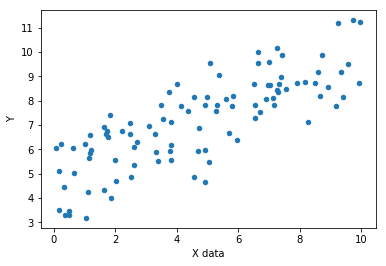

In [45]:
my_data.sample(n=100).plot(kind='scatter',x='X data',y='Y')

In [0]:
batch_size=8

In [47]:
np.random.randn(2)

array([-0.34425685, -0.44593259])

In [0]:
m=tf.Variable(0.34)
b=tf.Variable(0.44)

In [0]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model=m*xph+b

In [0]:
error=tf.reduce_mean(tf.square(yph-y_model))

In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)


In [0]:
init=tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  batches=10000
  
  for i in range(batches):
    
    rand_ind=np.random.randint(len(x_data),size=batch_size)
    
    feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
    
    sess.run(train,feed_dict=feed)
  model_m ,model_b=sess.run([m,b])
  

In [0]:
y_hat=x_data*model_m+model_b

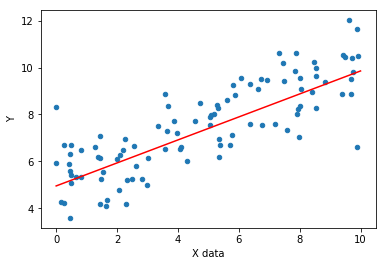

In [71]:
my_data.sample(n=100).plot(kind='scatter',x='X data',y='Y')
plt.plot(x_data,y_hat,"r")